In [8]:
# 输出九九乘法表
for i in range(1,10):
    for j in range(1,i+1):
        print('%d*%d=%d' % (i, j, i * j), end='\t')
    print()

1*1=1	
2*1=2	2*2=4	
3*1=3	3*2=6	3*3=9	
4*1=4	4*2=8	4*3=12	4*4=16	
5*1=5	5*2=10	5*3=15	5*4=20	5*5=25	
6*1=6	6*2=12	6*3=18	6*4=24	6*5=30	6*6=36	
7*1=7	7*2=14	7*3=21	7*4=28	7*5=35	7*6=42	7*7=49	
8*1=8	8*2=16	8*3=24	8*4=32	8*5=40	8*6=48	8*7=56	8*8=64	
9*1=9	9*2=18	9*3=27	9*4=36	9*5=45	9*6=54	9*7=63	9*8=72	9*9=81	


说明：CRAPS又称花旗骰，是美国拉斯维加斯非常受欢迎的一种的桌上赌博游戏。  
该游戏使用两粒骰子，玩家通过摇两粒骰子获得点数进行游戏。  
简单的规则是：玩家第一次摇骰子如果摇出了7点或11点，玩家胜； 
            玩家第一次如果摇出2点、3点或12点，庄家胜；  
            其他点数玩家继续摇骰子，如果玩家摇出了7点，庄家胜；  
            如果玩家摇出了第一次摇的点数，玩家胜；  
            其他点数，玩家继续要骰子，直到分出胜负。 


**测试**

In [ ]:
from random import randint
money = 1000
while money > 0:
    print('你的总资产为:', money)
    needs_go_on = False
    while True:
        debt = int(input('请下注: '))
        if 0 < debt <= money:
            break
    first = randint(1, 6) + randint(1, 6)
    print('玩家摇出了%d点' % first)
    if first == 7 or first == 11:
        print('玩家胜!')
        money += debt
    elif first == 2 or first == 3 or first == 12:
        print('庄家胜!')
        money -= debt
    else:
        needs_go_on = True
    while needs_go_on:
        needs_go_on = False
        current = randint(1, 6) + randint(1, 6)
        print('玩家摇出了%d点' % current)
        if current == 7:
            print('庄家胜')
            money -= debt
        elif current == first:
            print('玩家胜')
            money += debt
        else:
            needs_go_on = True
print('你破产了, 游戏结束!')

In [1]:
import numpy as np

In [4]:
def test1(n):
    for i in range(100):
        if i==n:
            return i
    for i in range(100):
        if i==n+1:
            return i
    return i
         

In [7]:
print(test1(55))

55


In [14]:
for i in np.arange(0,100,10):
    print(i)

0
10
20
30
40
50
60
70
80
90


In [15]:
import pandas as pd

In [22]:
aaa=pd.qcut(np.arange(0,110,10),9)

In [24]:
for i in aaa:
    print(i)

(-0.001, 11.111]
(-0.001, 11.111]
(11.111, 22.222]
(22.222, 33.333]
(33.333, 44.444]
(44.444, 55.556]
(55.556, 66.667]
(66.667, 77.778]
(77.778, 88.889]
(88.889, 100.0]
(88.889, 100.0]


In [25]:
np.arange(0,110,10)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [29]:
pd.cut(range(1,1000,20),np.arange(0,1100,100)).value_counts()

(0, 100]       5
(100, 200]     5
(200, 300]     5
(300, 400]     5
(400, 500]     5
(500, 600]     5
(600, 700]     5
(700, 800]     5
(800, 900]     5
(900, 1000]    5
dtype: int64

/Users/gengbh/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gengbh/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

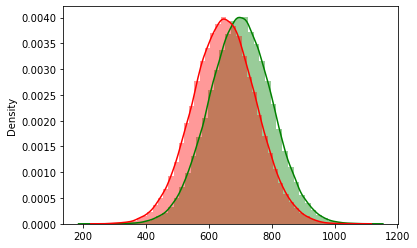

In [30]:
import numpy as np
import seaborn as sns

# 好/负样本分布
mu = 700
sigma = 100
sample_no = 100000
np.random.seed(0)
good_score_list = list(np.random.normal(mu, sigma, sample_no)) 
good_label_list = [0] * sample_no

# 坏/正样本分布
mu = 650
sigma = 100
sample_no = 100000
np.random.seed(2)
bad_score_list = list(np.random.normal(mu, sigma, sample_no))
bad_label_list = [1] * sample_no

sns.distplot(good_score_list, color='g')
sns.distplot(bad_score_list,  color='r')

In [32]:
from scipy.stats import ks_2samp
from sklearn import metrics
bad_cnt_list = []
ks_list = []
auc_list = []

for bad_cnt in range(50, 10000, 1):
    sampled_bad_score_list = list(np.random.choice(bad_score_list, size=bad_cnt))
    sampled_bad_label_list = [1] * bad_cnt
    ks = ks_2samp(sampled_bad_score_list, good_score_list).statistic
    fpr, tpr, thresholds = metrics.roc_curve(good_label_list + sampled_bad_label_list, 
                                             good_score_list + sampled_bad_score_list, pos_label=0)
    auc = metrics.auc(fpr, tpr)
    bad_cnt_list.append(bad_cnt)
    ks_list.append(ks)
    auc_list.append(auc)

In [33]:
import numpy as np
ks_std_list = []
auc_std_list = []
idx_list = []
for idx in range(8000, 0, -1): # 从右到左滑窗切片
    idx_list.append(idx + 50)
    
    win_ks_list = ks_list[idx:]
    ks_std = np.std(win_ks_list)
    ks_std_list.append(ks_std)
    
    win_auc_list = auc_list[idx:]
    auc_std = np.std(win_auc_list)
    auc_std_list.append(auc_std)

In [2]:
a=[i for i in range(5)]
a

[0, 1, 2, 3, 4]